<a href="https://colab.research.google.com/github/aysbt/DataScienceProject/blob/master/Classify_Online_Text_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify Online Text Reviews
## Problem Statement

* Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
* The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.
* Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews

## Import Libraries

In [34]:
# import the libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/amazon_alexa.tsv', sep='\t')

In [37]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


## Visulaize the Dataset

In [38]:
#import the plotly express for interactive plot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#distrubution of feedbacks
feedback = data['feedback'].value_counts()
rating = data['rating'].value_counts()
variation = data['variation'].value_counts()

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(values= feedback.values, 
                     labels=['Positive','Negative'], 
                     title='Distribution of Feedback',
                     textinfo='label+percent',
                     marker_colors=['rgb(56, 75, 126)', 'rgb(18, 36, 37)']
                     
                     ),1,1) 
fig.add_trace(go.Pie(values=rating.values, 
                     labels=rating.index, 
                     title='Distribution of Rating',
                     textinfo='label+percent'
                     ),1,2)
fig.add_trace(go.Pie(values=variation.values,
                     labels=variation.index,
                     title='Distribution of Variation',
                     textinfo='label+percent'),
                     1,3)
fig = go.Figure(fig)
fig.update_layout(showlegend=False)
fig.show()



In [39]:
import plotly.express as px

fig = px.bar(variation, x=variation.index, y=variation.values, color=variation.index)
fig.update_layout(showlegend=False)
fig.show()


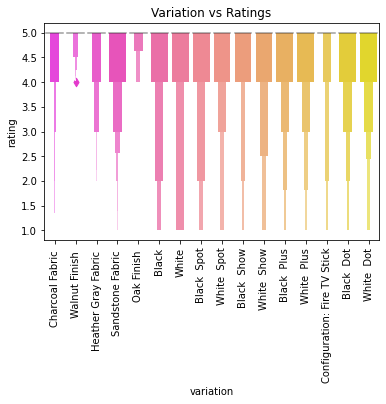

In [40]:
sns.boxenplot(data['variation'], data['rating'], palette = 'spring')
plt.title("Variation vs Ratings")
plt.xticks(rotation = 90)
plt.show()

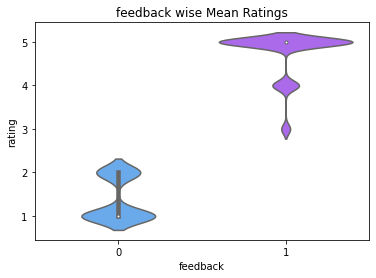

In [41]:


sns.violinplot(data['feedback'], data['rating'], palette = 'cool')
plt.title("feedback wise Mean Ratings")
plt.show()

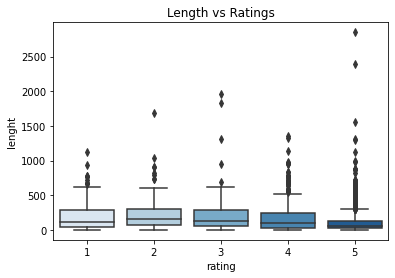

In [42]:
data['lenght'] = data['verified_reviews'].apply(len)
sns.boxplot(data['rating'], data['lenght'], palette = 'Blues')
plt.title("Length vs Ratings")
plt.show()

In [43]:
#Drop the date and rating for simplicity and drop lenght created for visulation
data.drop(['rating','date','lenght'], axis =1, inplace=True)

## Data Cleaning

In [44]:
#get dummies for variation colum
variation_dummies = pd.get_dummies(data['variation'], drop_first=True)


In [45]:
data.drop(['variation'], axis=1, inplace=True)

In [46]:
data = pd.concat([data, variation_dummies], axis=1)
data.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [47]:
#Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

data_vectorizer = vectorizer.fit_transform(data['verified_reviews'])


In [48]:
reviews = pd.DataFrame(data_vectorizer.toarray())
reviews.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
data.drop(['verified_reviews'], axis=1, inplace=True)

In [50]:
data

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [51]:
data = pd.concat([data, reviews], axis=1)
data.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
y = data['feedback']
y = y.values.reshape(-1,1)
X = data.drop(['feedback'], axis=1)


In [53]:
print(f'X shape: {X.shape}\ny shape: {y.shape} ')

X shape: (3150, 4059)
y shape: (3150, 1) 


In [54]:
# Model and Training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [178]:
ANN_classifier = tf.keras.models.Sequential()
ANN_classifier.add(tf.keras.layers.Dense(units =400, activation='relu', input_shape=(X_train.shape[1],)))


ANN_classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ANN_classifier.summary()


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 400)               1624000   
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 401       
Total params: 1,624,401
Trainable params: 1,624,401
Non-trainable params: 0
_________________________________________________________________


In [179]:
ANN_classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs_history = ANN_classifier.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
63/63 [==============================] - 1s 16ms/step - loss: 0.3675 - accuracy: 0.9157 - val_loss: 0.2525 - val_accuracy: 0.9107
Epoch 2/15
63/63 [==============================] - 1s 13ms/step - loss: 0.1335 - accuracy: 0.9499 - val_loss: 0.2133 - val_accuracy: 0.9226
Epoch 3/15
63/63 [==============================] - 1s 13ms/step - loss: 0.0743 - accuracy: 0.9717 - val_loss: 0.2611 - val_accuracy: 0.9246
Epoch 4/15
63/63 [==============================] - 1s 13ms/step - loss: 0.0465 - accuracy: 0.9836 - val_loss: 0.2657 - val_accuracy: 0.9325
Epoch 5/15
63/63 [==============================] - 1s 13ms/step - loss: 0.0334 - accuracy: 0.9911 - val_loss: 0.3021 - val_accuracy: 0.9306
Epoch 6/15
63/63 [==============================] - 1s 13ms/step - loss: 0.0263 - accuracy: 0.9926 - val_loss: 0.3183 - val_accuracy: 0.9306
Epoch 7/15
63/63 [==============================] - 1s 13ms/step - loss: 0.0218 - accuracy: 0.9936 - val_loss: 0.3417 - val_accuracy: 0.9325
Epoch 8/15
63

In [73]:
epochs_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

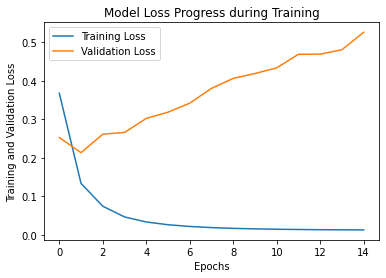

In [180]:
plt.plot(epochs_history.history['loss'], label='Training Loss')
plt.plot(epochs_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress during Training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend()


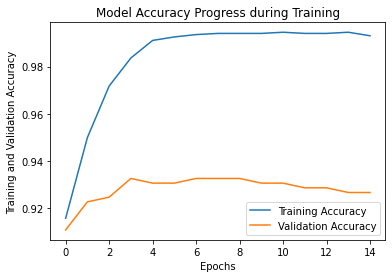

In [181]:
plt.plot(epochs_history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Progress during Training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Accuracy')
plt.legend()

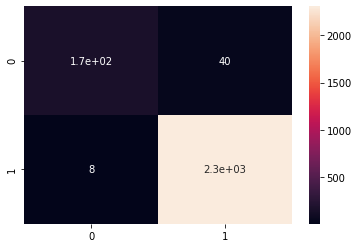

In [182]:
from sklearn.metrics import  confusion_matrix
#Evaluation of Model
y_predict_train = ANN_classifier.predict(X_train)
y_predict_train = (y_predict_train >0.5)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

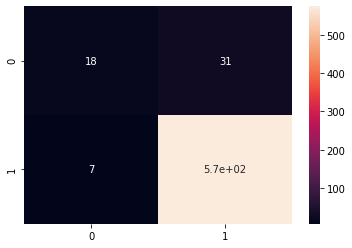

In [183]:
y_predict_test = ANN_classifier.predict(X_test)
y_predict_test = (y_predict_test > 0.5)

cm_test = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm_test, annot=True)
